In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [3]:
train=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

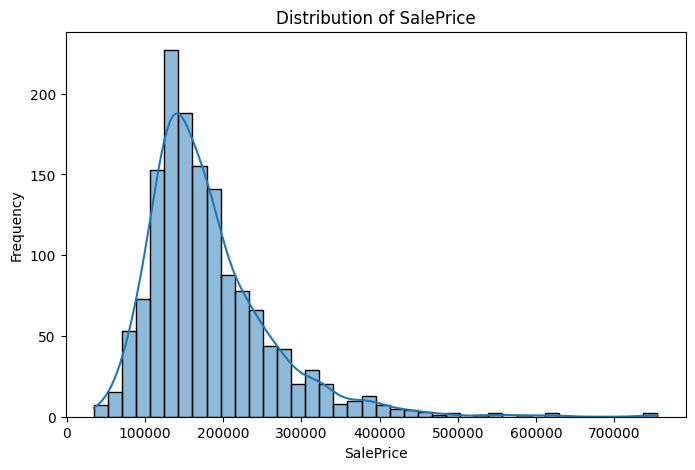

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
#distribution of sales price
plt.figure(figsize=(8,5))
sns.histplot(train['SalePrice'], kde=True, bins=40)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()


right skewed

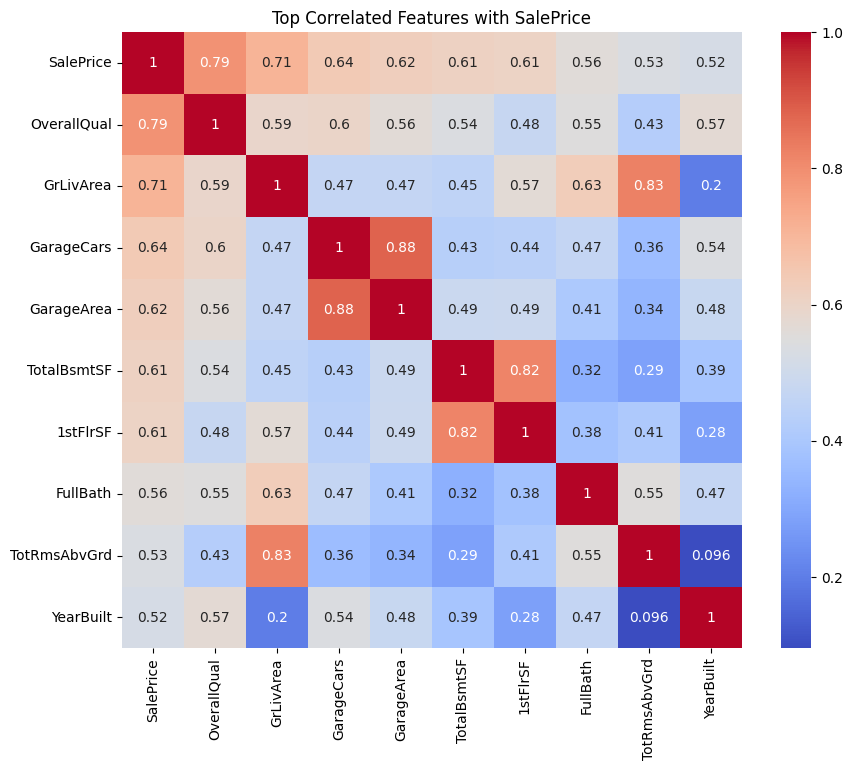

In [9]:
#correlation analysis
corr = train.select_dtypes(include=['int64','float64']).corr()

top = corr['SalePrice'].abs().sort_values(ascending=False).head(10).index

plt.figure(figsize=(10,8))
sns.heatmap(train[top].corr(), annot=True, cmap='coolwarm')
plt.title("Top Correlated Features with SalePrice")
plt.show()


In [10]:
y = train['SalePrice']
X = train.drop('SalePrice', axis=1)

In [11]:
full = pd.concat([X, test], axis=0) #full dataset

In [12]:
full = pd.get_dummies(full) #dummy var for categorial data

In [13]:
X = full.iloc[:len(train), :]
X_test = full.iloc[len(train):, :]

In [14]:
from sklearn.impute import SimpleImputer
#missing values
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)
X_test = imputer.transform(X_test)

In [15]:
from sklearn.model_selection import train_test_split # splitting for validation metrics
Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression (Multivariate) 

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xtr, ytr)

LinearRegression()

In [17]:
pred_tr_lr = lr.predict(Xtr)
pred_val_lr = lr.predict(Xval)

In [18]:
#metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_train_lr = mean_squared_error(ytr, pred_tr_lr)
rmse_train_lr = np.sqrt(mse_train_lr)

mse_val_lr = mean_squared_error(yval, pred_val_lr)
rmse_val_lr = np.sqrt(mse_val_lr)

mae_lr = mean_absolute_error(yval, pred_val_lr)
r2_lr = r2_score(yval, pred_val_lr)

gap_lr = rmse_val_lr - rmse_train_lr

print("Linear Regression Metrics")
print("RMSE of train):", rmse_train_lr)
print("RMSE val:  ", rmse_val_lr)
print("MAE:", mae_lr)
print("R square score:", r2_lr)
print("Gap:", gap_lr)

Linear Regression Metrics
RMSE of train): 18903.82412766399
RMSE val:   65371.38417505943
MAE: 21171.53008384251
R square score: 0.44286360794420965
Gap: 46467.56004739544


# Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=0
)
rf.fit(Xtr, ytr)

RandomForestRegressor(n_estimators=300, random_state=0)

In [20]:
pred_tr_rf = rf.predict(Xtr)
pred_val_rf = rf.predict(Xval)

In [21]:
mse_train_rf = mean_squared_error(ytr, pred_tr_rf)
rmse_train_rf = np.sqrt(mse_train_rf)

mse_val_rf = mean_squared_error(yval, pred_val_rf)
rmse_val_rf = np.sqrt(mse_val_rf)

mae_rf = mean_absolute_error(yval, pred_val_rf)
r2_rf = r2_score(yval, pred_val_rf)

gap_rf = rmse_val_rf - rmse_train_rf

print("Random Forest Metrics")
print("RMSE of train:", rmse_train_rf)
print("RMSE of val:", rmse_val_rf)
print("MAE:", mae_rf)
print("R²:", r2_rf)
print("Gap:", gap_rf)

Random Forest Metrics
RMSE of train: 11289.922713886863
RMSE of val: 29472.14170118526
MAE: 17745.137579908678
R²: 0.8867574711958333
Gap: 18182.218987298398


# Gradient Boosting Machine

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=300,learning_rate=0.05,max_depth=3,
    random_state=0)

gb.fit(Xtr, ytr)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=300, random_state=0)

In [23]:
pred_tr_gb = gb.predict(Xtr)
pred_val_gb = gb.predict(Xval)

In [24]:
mse_train_gb = mean_squared_error(ytr, pred_tr_gb)
rmse_train_gb = np.sqrt(mse_train_gb)

mse_val_gb = mean_squared_error(yval, pred_val_gb)
rmse_val_gb = np.sqrt(mse_val_gb)

mae_gb = mean_absolute_error(yval, pred_val_gb)
r2_gb = r2_score(yval, pred_val_gb)

gap_gb = rmse_val_gb - rmse_train_gb

print("Gradient Boosting ")
print("RMSE train:", rmse_train_gb)
print("RMSE val:", rmse_val_gb)
print("MAE:", mae_gb)
print("R square error:", r2_gb)
print("generalisation gap:", gap_gb)

Gradient Boosting 
RMSE train: 11347.840974347284
RMSE val: 26759.61335835844
MAE: 16805.491068012067
R square error: 0.9066432264096058
generalisation gap: 15411.772384011158


# Model Comparison

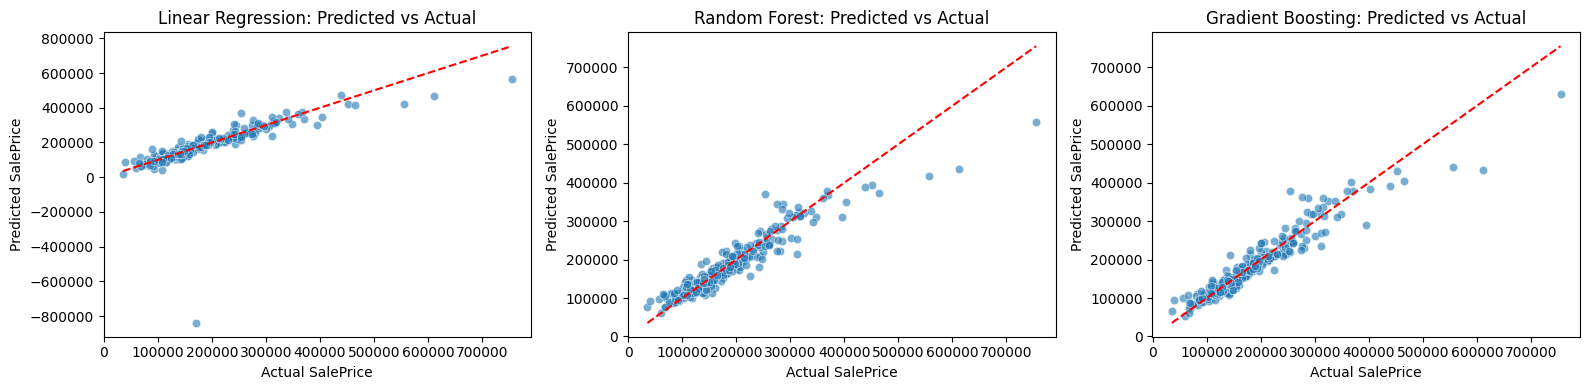

In [25]:
models = {"Linear Regression": pred_val_lr,"Random Forest": pred_val_rf,
    "Gradient Boosting": pred_val_gb}

plt.figure(figsize=(16,4))
for i, (name, pred) in enumerate(models.items(), 1):
    plt.subplot(1,3,i)
    sns.scatterplot(x=yval, y=pred, alpha=0.6)
    plt.plot([yval.min(), yval.max()], [yval.min(), yval.max()], 'r--')
    plt.title(f"{name}: Predicted vs Actual")
    plt.xlabel("Actual SalePrice")
    plt.ylabel("Predicted SalePrice")
plt.tight_layout()
plt.show()

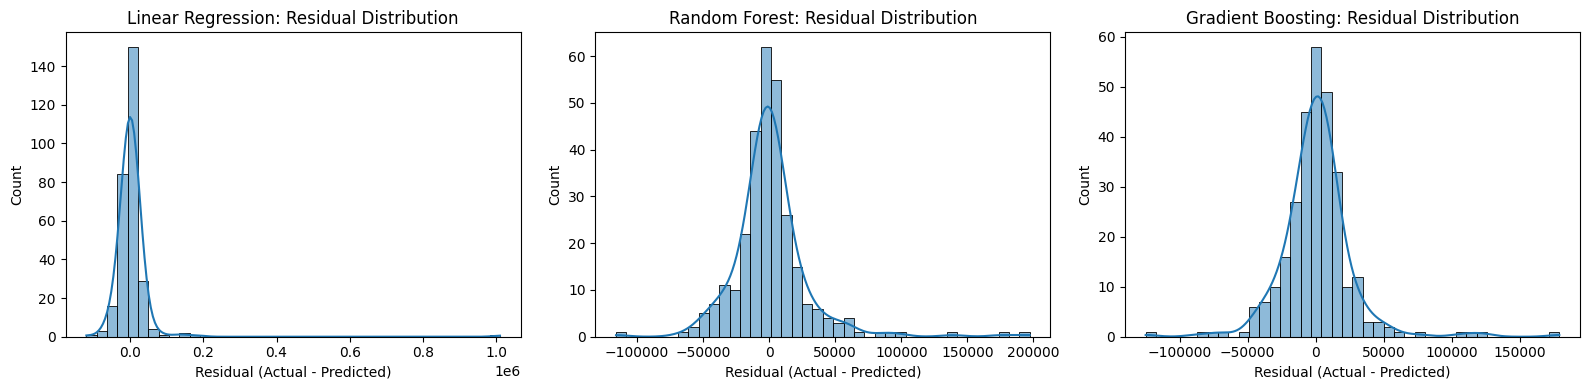

In [26]:
plt.figure(figsize=(16,4))
for i, (name, pred) in enumerate(models.items(), 1):
    residuals = yval - pred
    plt.subplot(1,3,i)
    sns.histplot(residuals, kde=True, bins=40)
    plt.title(f"{name}: Residual Distribution")
    plt.xlabel("Residual (Actual - Predicted)")
plt.tight_layout()
plt.show()


GRADIENT BOOSTING IS BETTER

In [27]:
#selected GBM for submission
from sklearn.ensemble import GradientBoostingRegressor

final_model = GradientBoostingRegressor(n_estimators=300,learning_rate=0.05,max_depth=3,random_state=0)

final_model.fit(X, y)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=300, random_state=0)

In [28]:
pred_test = final_model.predict(X_test)

In [29]:
# submission file
submission = pd.DataFrame({"Id": test["Id"],"SalePrice": pred_test})
submission.to_csv('submission.csv', index=False)


print("submitted successfully")

submitted successfully
